# 流形学习-高维数据的降维与可视化

## 流形学习的概念

流形学习方法(Manifold Learning)，简称流形学习，自2000年在著名的科学杂志《Science》被首次提出以来，已成为信息科学领域的研究热点。在理论和应用上，流形学习方法都具有重要的研究意义。

假设数据是均匀采样于一个高维欧氏空间中的低维流形，流形学习就是从高维采样数据中恢复低维流形结构，即找到高维空间中的低维流形，并求出相应的嵌入映射，以实现维数约简或者数据可视化。它是从观测到的现象中去寻找事物的本质，找到产生数据的内在规律。

流形学习的观点是认为，我们所能观察到的数据实际上是由一个低维流形映射到高维空间上的。由于数据内部特征的限制，一些高维中的数据会产生维度上的冗余，实际上只需要比较低的维度就能唯一地表示。

举个例子，比如说我们在平面上有个圆，如何表示这个圆呢？如果我们把圆放在一个平面直角坐标系中，那一个圆实际上就是由一堆二维点构成的。
比如一个单位圆： (1, 0) 是一个在圆上的点， (0, 1) 也是一个在圆上的点，但 (0,0) 和 (2,3) 等等很多点是不在这个圆上的。
显然如果用二维坐标来表示，我们没有办法让这个二维坐标系的所有点都是这个圆上的点。也就是说，用二维坐标来表示这个圆其实是有冗余的。
我们希望，如果能建立某一种描述方法，让这个描述方法所确定的所有点的集合都能在圆上，甚至能连续不间断地表示圆上的点，那就好了！
有没有这种方法呢？对于圆来说，当然有！那就是用极坐标。在极坐标的表示方法下，圆心在原点的圆，只需要一个参数就能确定：半径。
当你连续改变半径的大小，就能产生连续不断的“能被转换成二维坐标表示”的圆。所以说，实际上二维空间中的圆就是一个一维流形。
与之相似的，三维空间中一个球面，用x, y, z三个坐标轴确定时会产生冗余（很多在三维空间中的数据点并不在球面上）。但其实只需要用两个坐标就可以确定了，比如经度和维度。
只要给定任何合法的经度和维度，我们就都能保证这个点肯定在球面上！
那么，流形学习有什么用呢？我现在能想到的主要有两个方面。

- 先说第一个方面。高维空间有冗余，低维空间没冗余。也就是说，流形可以作为一种数据降维的方式。传统很多算法都是用欧氏距离作为评价两个点之间的距离函数的。但是仔细想想这种欧氏距离直觉上并不靠谱。“我们只是看到了三维数据，就要用三维坐标系内的尺度去对事物进行评价？”总觉得有些怪怪的。举个例子，从北京到上海有多远？你可以找一个地球仪，然后用一把能弯曲的软软的尺子，经过地球仪表面然后测量一下这两个点的距离。但是如果我用一根直线，将地球仪从北京到上海洞穿，测量出一个更短的距离，你一定会觉得我疯了。这说明，尽管你得到的北京和上海的坐标是三维空间坐标(x,y,z)，但使用欧氏距离对于“在高维空间展开的低维流型”进行距离的衡量是不正确的。显然对于“从北京到上海的距离”这件事，我们关注的是把三维地球展开成二维平面，然后测量的地表上的距离，而不是三维空间中球面上两个点的欧氏距离。既“流型空间上的可以用欧氏距离，不代表低维流型所展开的高维空间中也可以使用欧氏距离进行衡量”。只有在流型空间，用欧氏距离才有意义。但实际上很多时候，尽管是高维空间，但出于简便，我们仍然近似使用欧氏距离。但通常来说效果都不会太好。不过我们通过一些变换，将原始的高维空间的数据映射但低维流型空间然后再用欧氏距离衡量。或者干脆用一种能够在高维空间更准确地度量距离的距离函数来替代欧氏距离。这样能取得更加合理的距离度量结果。举个例子，假如说决策部门打算把一些离得比较近的城市聚成一堆，然后组建个大城市。这时候“远近”这个概念显然是指地表上的距离，因为说空间直线距离并没有什么意义。而对于降维算法来说，如果使用传统的欧氏距离来作为距离尺度，显然会抛弃“数据的内部特征”。如果测量球面两点距离采用空间欧氏距离，那就会忽略掉“这是个球面”这个信息。

其实用一幅图就都明白了，那就是传说中的瑞士卷：

![](pic/1.jpg)

如果我们观察到的数据是三维的，但其本质是一个二维流形。图上所标注的两个圈圈，在流形（把卷展开）上本距离非常远，但是用三维空间的欧氏距离来计算则它们的距离要近得多。所以说，流形学习的一个主要应用就是“非线性降维” (参见Wikipedia: Nonlinear dimensionality reduction)。而非线性降维因为考虑到了流形的问题，所以降维的过程中不但考虑到了距离，更考虑到了生成数据的拓扑结构。

- 第二个方面，流形能够刻画数据的本质。也就是说。既然学习到了“将数据从高维空间降维到低维空间，还能不损失信息”的映射，那这个映射能够输入原始数据，输出数据更本质的特征(就像压缩一样，用更少的数据能尽可能多地表示原始数据)。这方面也是深度学习一直在搞的事情。深度学习主要的特点就是“特征学习”，所谓特征，就是能“表示事物本质的内容”，一般来说特征的维度应该小于数据本身。有一些实证证实，大脑处理数据其实是通过记忆、重现的方式。数据那么多，大脑怎么能一一记住？那就可以只记住“特征”！例如我们直到“人”都是两只眼睛一个鼻子一张嘴。而具体到每一个人则是再这个基本特征之上添加了一些其他的特异性的内容仅此而已。深度学习一直以来就是在模仿大脑的结构，或者说在模仿大脑对数据的处理能力：从底层感受器输入原始数据，逐步求精得到特征。所谓的特征，在一定程度上就可以用流形的概念来解释。我们希望我们的模型能够学习到“数据在流型空间中的表示”。如果能做到这一点，则说明我们的模型离“模拟大脑”又前进了一步。

https://www.zhihu.com/question/24015486

- 关于“冗余”，补充一下：

数据因为固有的特性，导致无法“填满”整个高维空间。例如如果数据只能出现在三维空间中的一个球面上。那这个球面以外的空间永远不会有数据点。而一个表面我们完全可以只用两个参数来表示(经度、维度)。
所以这个球面是一个二维流型的三维展开。

再举个例子：身份证号。我们的身份证号是18位的。但是身份证号有严格的格式：3位省3位市8位生日4位其他编码。这18位，最多能出现 10的18次方个不同的编码。但由于格式的限制，很多编码是不可能产生的。例如“999888777766554321”这就不可能出现。但我们可以给每一个新出生的人一个连续的编码。只需要10位数字，就足够代表100亿人了。
所以当我们有某种方法，能够找到一个从18维空间映射到10维空间的方法。那么这个10维空间就是数据“最本质”的特征了。例如一张图片是256×256=65536维空间的。如果我们能找到一个到2维空间的完美映射。就能得到“只需要用两个维度就能唯一地表示数据特征”的方法。例如两个维度可能是头转向的角度(上下、左右)。那么只需要改变这个2维编码，再还原会65536维空间，再reshape成256×256的图片，就能得到同一张人脸连续地“转头”、“点头”的样子。

- 而流形学习就是在考虑：1，如何找到这个从高维到低维的映射。2，哪怕不能直接找到这个映射，那我们可以找到某种方法，在高维空间处理数据，等效于“将高维空间映射到低维空间、再处理数据、再映射回高维空间”的这种操作。

它(流型学习)只能对被用来训练它的数据进行变换。

其实流行学习一直有的一个问题，就是它的训练和处理都是在一个封闭的集合中进行的。也就是说，它很难跳出数据固有的模式，产生新的模式，所以现在不少研究adversarial learning的人们认为流行学习和GAN之类的模型，实际上就是在做对训练数据的data augmentation，亦即通过捕获训练数据的分布，再对这个分布进行重采样而得到更多的数据。而由于训练数据和测试数据是必然存在bias的，所以训练数据的模式对拟合测试数据来说是永远做不到完美的。

再回到你提出的问题，我并没有从这段文字中看出来作者想要表达“流型学习不能用于降维”的意思来。而且在做visualization的主要操作就是降维，像t-SNE或者DBSCAN之类的算法，就是通过流型降维来做可视化和聚类的。

流形学习中一个大的假设就是极高维的空间中数据实际上都分布在一个潜在的流形上，有人测定mnist数据分布在一个六维的流形上，而且你从不同角度拍的不管多大像素的关于某一物体的照片，潜在流形的维度和运动自由度一样。我们通过各种算法，或线性或者分线性来恢复这个流形，达到降维的目的。一般情况下，现在的算法对非凸的流形面（有空洞），以及噪声环境下的数据鲁棒性都不是很理想。
流形学习可以说是用来理解机器学习（尤其是表征学习）的另一个工具。

## 流形学习的分类

可以将流形学习方法分为线性的和非线性的两种，线性的流形学习方法如我们熟知的主成份分析（PCA），非线性的流形学习方法如等距映射（Isomap）、拉普拉斯特征映射（Laplacian eigenmaps，LE）、局部线性嵌入(Locally-linear embedding，LLE)。

当然，流形学习方法不止这些，因学识尚浅，在此我就不展开了，对于它们的原理，也不是一篇文章就能说明白的。对各种流形学习方法的介绍，网上有一篇不错的读物（原作已找不到）：
https://blog.csdn.net/zhulingchen/article/details/2123129

## 高维数据降维与可视化

对于数据降维，有一张图片总结得很好：
![](pic/2.png)

图中基本上包括了大多数流形学习方法，不过这里面没有t-SNE,相比于其他算法，t-SNE算是比较新的一种方法，也是效果比较好的一种方法。t-SNE是深度学习大牛Hinton和lvdmaaten（他的弟子？）在2008年提出的，lvdmaaten对t-SNE有个主页介绍：tsne,包括论文以及各种编程语言的实现。


接下来是一个小实验，对MNIST数据集降维和可视化，采用了十多种算法，算法在sklearn里都已集成，画图工具采用matplotlib。大部分实验内容都是参考sklearn这里的example，稍微做了些修改。

### 加载数据

MNIST数据从sklearn集成的datasets模块获取，代码如下，为了后面观察起来更明显，我这里只选取n_class=5，也就是0～4这5种digits。每张图片的大小是8*8，展开后就是64维。

In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn import (manifold, datasets, decomposition, ensemble,random_projection)
from sklearn.decomposition import LatentDirichletAllocation as lda

(901, 64)


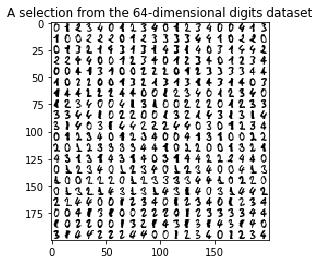

In [2]:
#加载数据，显示数据
digits = datasets.load_digits(n_class=5)
X = digits.data
y = digits.target
print(X.shape)
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))
plt.imshow(img, cmap=plt.cm.binary)
plt.title('A selection from the 64-dimensional digits dataset')

#LLE,Isomap,LTSA需要设置n_neighbors这个参数
n_neighbors = 30

### 降维

以t-SNE为例子，代码如下，n_components设置为3，也就是将64维降到3维，init设置embedding的初始化方式，可选random或者pca，这里用pca，比起random init会更stable一些。

In [3]:
# 将降维后的数据可视化,2维
def plot_embedding_2d(X, title=None):
    #坐标缩放到[0,1]区间
    x_min, x_max = np.min(X,axis=0), np.max(X,axis=0)
    X = (X - x_min) / (x_max - x_min)

    #降维后的坐标为（X[i, 0], X[i, 1]），在该位置画出对应的digits
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    for i in range(X.shape[0]):
        ax.text(X[i, 0], X[i, 1],str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if title is not None:
        plt.title(title)

In [4]:
#将降维后的数据可视化,3维
def plot_embedding_3d(X, title=None):
    #坐标缩放到[0,1]区间
    x_min, x_max = np.min(X,axis=0), np.max(X,axis=0)
    X = (X - x_min) / (x_max - x_min)

    #降维后的坐标为（X[i, 0], X[i, 1],X[i,2]），在该位置画出对应的digits
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    for i in range(X.shape[0]):
        ax.text(X[i, 0], X[i, 1], X[i,2],str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if title is not None:
        plt.title(title)

Computing random projection


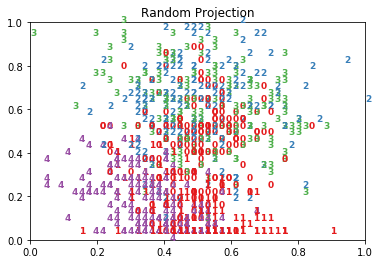

In [5]:
#随机映射
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding_2d(X_projected, "Random Projection")

Computing PCA projection


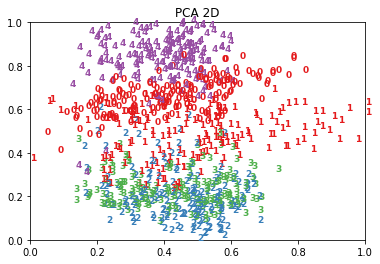

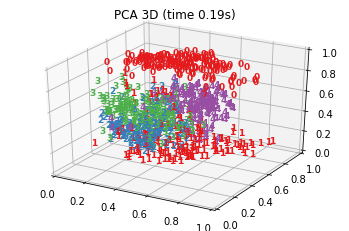

In [6]:
#PCA
print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=3).fit_transform(X)
plot_embedding_2d(X_pca[:,0:2],"PCA 2D")
plot_embedding_3d(X_pca,"PCA 3D (time %.2fs)" %(time() - t0))

Computing LDA projection


/home/x/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


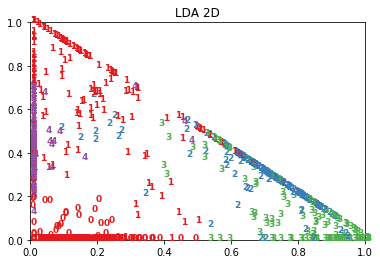

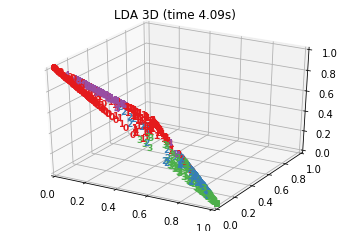

In [7]:
#LDA
print("Computing LDA projection")
X2 = X.copy()
X2.flat[::X.shape[1] + 1] += 0.01  # Make X invertible
t0 = time()
X_lda = lda(n_components=3).fit_transform(X2, y)
plot_embedding_2d(X_lda[:,0:2],"LDA 2D" )
plot_embedding_3d(X_lda,"LDA 3D (time %.2fs)" %(time() - t0))

Computing Isomap embedding
Done.


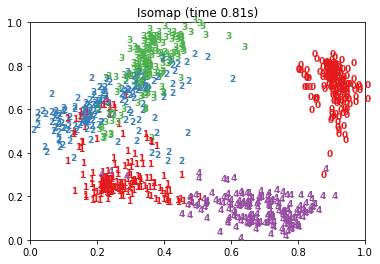

In [8]:
#Isomap
print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)
print("Done.")
plot_embedding_2d(X_iso,"Isomap (time %.2fs)" %(time() - t0))

Computing LLE embedding
Done. Reconstruction error: 1.11351e-06


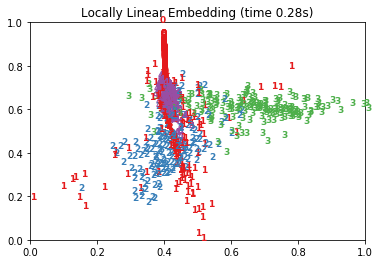

In [9]:
#standard LLE
print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,method='standard')
t0 = time()
X_lle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding_2d(X_lle,"Locally Linear Embedding (time %.2fs)" %(time() - t0))

Computing modified LLE embedding
Done. Reconstruction error: 0.282967


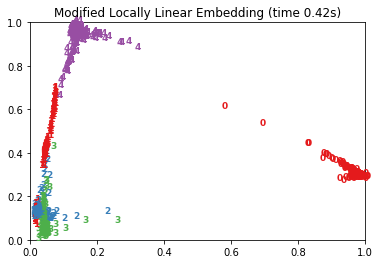

In [10]:
#modified LLE
print("Computing modified LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,method='modified')
t0 = time()
X_mlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding_2d(X_mlle,"Modified Locally Linear Embedding (time %.2fs)" %(time() - t0))

Computing Hessian LLE embedding
Done. Reconstruction error: 0.158396


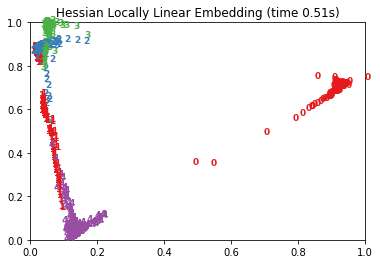

In [11]:
# HLLE
print("Computing Hessian LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,method='hessian')
t0 = time()
X_hlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding_2d(X_hlle,"Hessian Locally Linear Embedding (time %.2fs)" %(time() - t0))

Computing LTSA embedding
Done. Reconstruction error: 0.158394


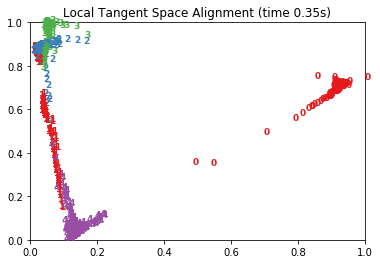

In [12]:
# LTSA
print("Computing LTSA embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,method='ltsa')
t0 = time()
X_ltsa = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding_2d(X_ltsa,"Local Tangent Space Alignment (time %.2fs)" %(time() - t0))

Computing MDS embedding
Done. Stress: 85610261.694118


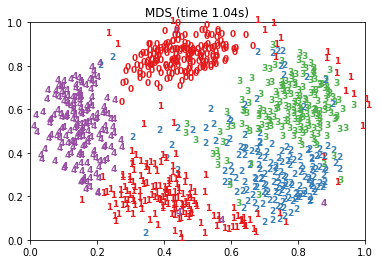

In [13]:
# MDS
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X)
print("Done. Stress: %f" % clf.stress_)
plot_embedding_2d(X_mds,"MDS (time %.2fs)" %(time() - t0))

Computing Totally Random Trees embedding


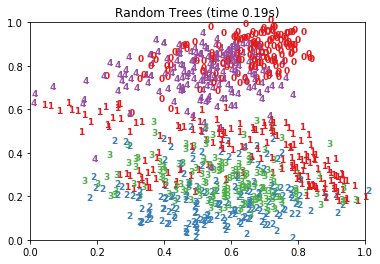

In [14]:
# Random Trees
print("Computing Totally Random Trees embedding")
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,max_depth=5)
t0 = time()
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)

plot_embedding_2d(X_reduced,"Random Trees (time %.2fs)" %(time() - t0))

Computing Spectral embedding


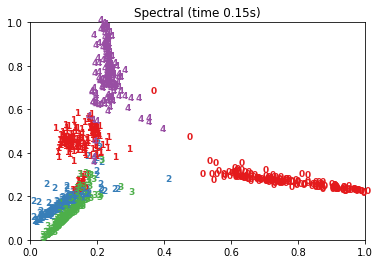

In [15]:
# Spectral
print("Computing Spectral embedding")
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0,eigen_solver="arpack")
t0 = time()
X_se = embedder.fit_transform(X)
plot_embedding_2d(X_se,"Spectral (time %.2fs)" %(time() - t0))

Computing t-SNE embedding
(901, 3)


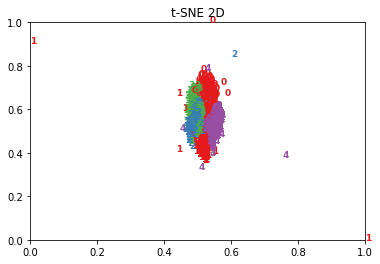

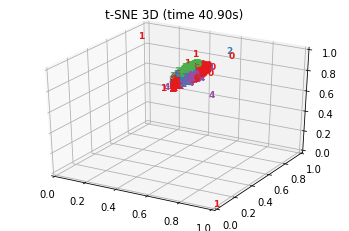

In [16]:
# t-SNE
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=3, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)
print(X_tsne.shape)
plot_embedding_2d(X_tsne[:,0:2],"t-SNE 2D")
plot_embedding_3d(X_tsne,"t-SNE 3D (time %.2fs)" %(time() - t0))

plt.show()

十多种算法，结果各有好坏，总体上t-SNE表现最优，但它的计算复杂度也是最高的。